## Homework 2

* Sklearn veri kümelerinden Şeker Hastalığı (Diabetes) Veri Kümesini içe aktarın.
* Ham veriyi inceleyin ve analiz edin.
* Regresyon uygulaması için ön işleme yapın.
* Veri kümenizi eğitim ve test alt kümlerine ayırın (eğitim için 0.7 ve test için 0.3 oran olacak şekilde).
* Ridge ve Lasso Regression modellerini, her biri için en az 5 farklı alfa değeri olacak şekilde deneyin.
* Tüm modellerin sonuçlarını değerlendirin ve en iyi performans gösteren modeli seçin.

In [1]:
# Ignore deprecation warnings
import warnings
warnings.filterwarnings('ignore')

# Şeker Hastalığı Veri Kümesini içe aktarın
import numpy as np
from sklearn.datasets import load_diabetes

df = load_diabetes(as_frame=True)["frame"]
df.head()
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [2]:
# Yinelenen değerleri ve eksik verileri kontrol edin
print("Duplicate samples:", df.duplicated().sum())
print("N/A features:", df.isna().sum().sum())

target = df["target"].copy()
features = df.drop(["target"], axis=1).copy()

print(features.shape)
print(target.shape)

Duplicate samples: 0
N/A features: 0
(442, 10)
(442,)


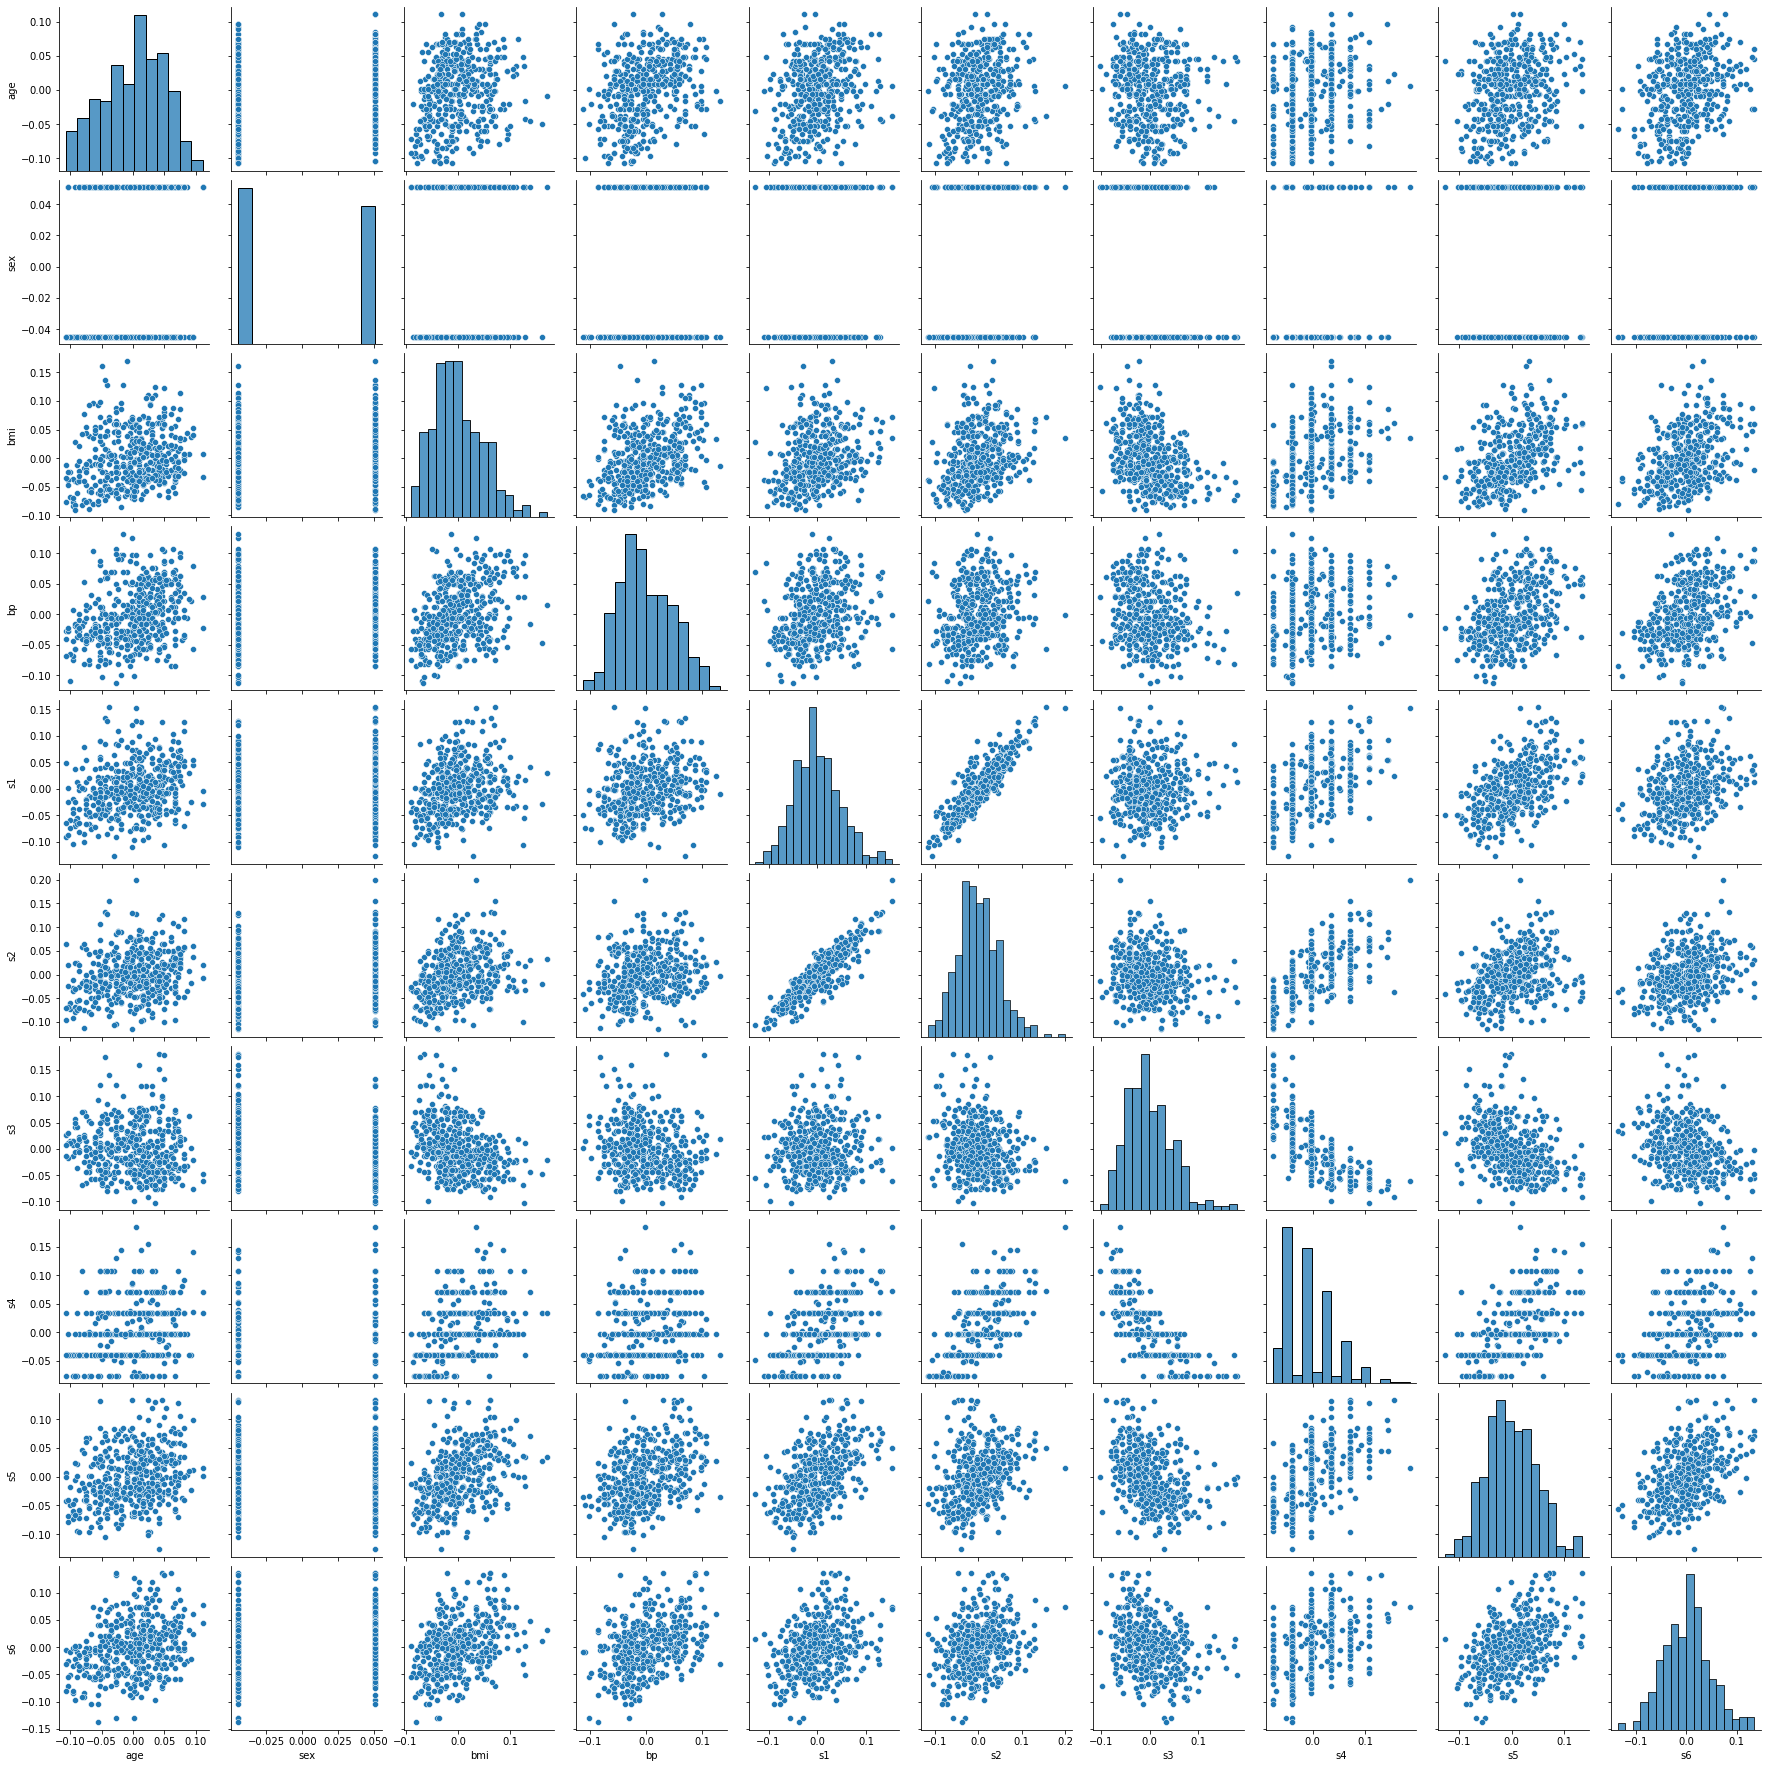

In [3]:
# Her özellik için verileri görselleştirin (pairplot, distplot)
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot
sns.pairplot(features)

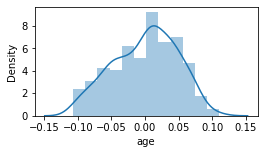

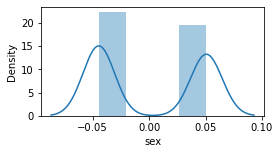

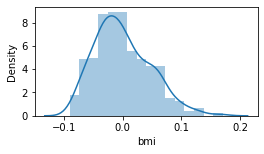

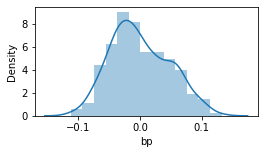

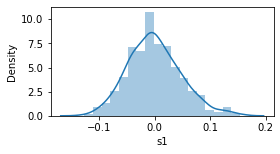

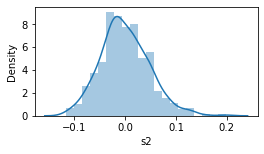

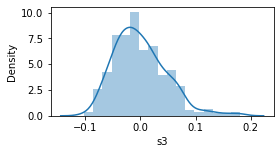

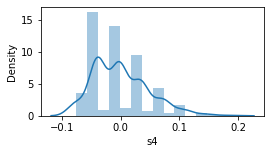

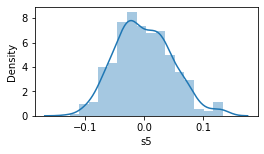

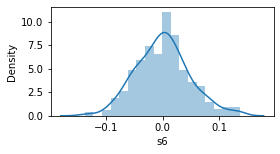

In [4]:
# Distplot for each column
for col in features.columns:
    plt.figure(figsize=(4, 2))
    sns.distplot(features[col])
    plt.show()

(10.5, -0.5)

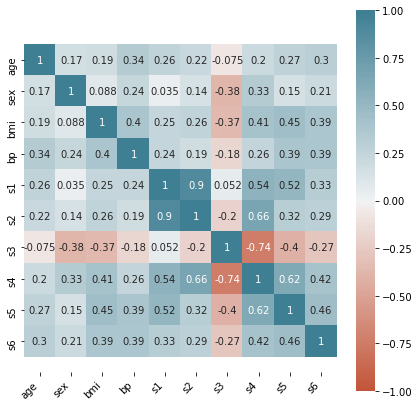

In [5]:
# Korelasyon matrisini bastırın ve yorumlayın
correlation_matrix = features.corr()

plt.figure(figsize=(7, 7))
ax = sns.heatmap(
    correlation_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(correlation_matrix)+0.5, -0.5)

`s1` ve `s2` öznitelikleri korele gözüküyor.

In [6]:
# İlişkili bulduğunuz özellikleri eleyin (korelasyon matrisini kontrol ederek)
features.drop(["s2"], axis=1, inplace=True)

X = features.values
y = target.values

In [7]:
# Aykırı değerleri işleyin (IsolationForest kullanabilirsiniz)

# Used zscore for outliers
from scipy import stats

zScores = np.abs(stats.zscore(features))
outliersIndexes = list(set(np.where(zScores > 3)[0]))
print("Outlier count:", len(outliersIndexes))

# Delete outlier rows from matrices
X = np.delete(X, outliersIndexes, axis=0)
y = np.delete(y, outliersIndexes, axis=0)

print(X.shape)
print(y.shape)

Outlier count: 12
(430, 9)
(430,)


In [8]:
# Özellikleri ölçekleyin. (scaling)
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
print(X.shape)
print(y.shape)

(430, 9)
(430,)


In [9]:
# Veri kümesini eğitim ve test verisetlerine ayırın.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=(42*24*44*22)) #whynot?

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(301, 9) (301,)
(129, 9) (129,)


In [10]:
# Lasso ve Rdige modellerini Sklearn'dan içe aktarın.
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression

In [11]:
# Lasso için 5 farklı alfa değeri tanımlayın ve modelleri eğitin. R^2 değerlerini 
# hem eğitim hem de test verisetleri için yazdırın.

alphaValues = [0.0001, 0.001, 0.01, 10, 100]
lassoModel = LassoCV(alphas=alphaValues, random_state=(42*24*44*22))
lassoModel.fit(X_train, y_train)

print("Train {0:.6f}, Test {1:.6f}".format(
    lassoModel.score(X_train, y_train),
    lassoModel.score(X_test, y_test)
))

Train 0.489914, Test 0.515160


In [12]:
# Ridge için 5 farklı alfa değeri tanımlayın ve modelleri eğitin. R^2 değerlerini 
# hem eğitim hem de test verisetleri için yazdırın.

alphaValues = [0.0001, 0.001, 0.01, 10, 100]
ridgeModel = RidgeCV(alphas=alphaValues)
ridgeModel.fit(X_train, y_train)

print("Train {0:.6f}, Test {1:.6f}".format(
    ridgeModel.score(X_train, y_train),
    ridgeModel.score(X_test, y_test)
))

Train 0.489622, Test 0.516112


In [13]:
# Check test set scores
print("Lasso r2 score {0:.6f}".format(lassoModel.score(X_test, y_test)))
print("Ridge r2 score {0:.6f}".format(ridgeModel.score(X_test, y_test)))

Lasso r2 score 0.515160
Ridge r2 score 0.516112


##### Sonuçlar hakkında yorum yapın. En iyi modelin katsayısını yazdırın.

In [14]:
ridgeModel.coef_

array([ -1.674204  , -13.69522302,  22.97676554,  15.49649892,
        -6.16631084, -12.41190544,   3.62781224,  19.22227641,
         6.0744882 ])